### https://www.python-graph-gallery.com/donut-plot/
### https://towardsdatascience.com/interesting-ways-to-select-pandas-dataframe-columns-b29b82bbfb33#:~:text=This%20is%20the%20most%20basic,Returns%20a%20pandas%20series.&text=Passing%20a%20list%20in%20the,columns%20at%20the%20same%20time.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mongoengine import *
import jsons

In [2]:
from pymongo import MongoClient
# pprint library is used to make the output look more pretty
from pprint import pprint
# connect to MongoDB, change the << MONGODB URL >> to reflect your own connection string
client = MongoClient("mongodb://localhost:27017/config")
db=client.config
# Issue the serverStatus command and print the results
serverStatusResult=db.command("serverStatus")
pprint(serverStatusResult)

{'asserts': {'msg': 13,
             'regular': 0,
             'rollovers': 0,
             'tripwire': 0,
             'user': 3394,
             'warning': 0},
 'catalogStats': {'capped': 0,
                  'collections': 0,
                  'internalCollections': 4,
                  'internalViews': 0,
                  'timeseries': 0,
                  'views': 0},
 'connections': {'active': 5,
                 'available': 838845,
                 'awaitingTopologyChanges': 4,
                 'current': 15,
                 'exhaustHello': 3,
                 'exhaustIsMaster': 0,
                 'threaded': 15,
                 'totalCreated': 888},
 'electionMetrics': {'averageCatchUpOps': 0.0,
                     'catchUpTakeover': {'called': 0, 'successful': 0},
                     'electionTimeout': {'called': 0, 'successful': 0},
                     'freezeTimeout': {'called': 0, 'successful': 0},
                     'numCatchUps': 0,
                     'numCat

                          'bytes belonging to page images in the cache': 54094056,
                          'bytes belonging to the history store table in the cache': 182,
                          'bytes currently in the cache': 103074374,
                          'bytes dirty in the cache cumulative': 42357972,
                          'bytes not belonging to page images in the cache': 48980318,
                          'bytes read into cache': 1490,
                          'bytes written from cache': 113726221,
                          'cache overflow score': 0,
                          'checkpoint blocked page eviction': 0,
                          'checkpoint of history store file blocked non-history store page eviction': 0,
                          'eviction calls to get a page': 2728,
                          'eviction calls to get a page found queue empty': 2288,
                          'eviction calls to get a page found queue empty after locking': 4,
            

In [3]:
fivestarcount = db.listingsAndReviews.find()[1:1]
listData = ''
for data in fivestarcount:
    listData += data.get('name')
    listData += ""



         BedType  Number_Of_Bed
0       Real Bed           5506
1  Pull-out Sofa             26
2          Futon             10
3          Couch              7
4         Airbed              6
0    5506
1      26
2      10
3       7
4       6
Name: Number_Of_Bed, dtype: int64
<class 'pandas.core.series.Series'>


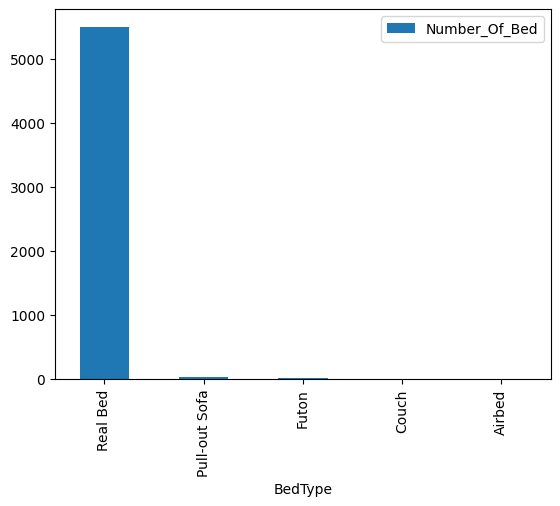

In [4]:
stargroup=db.listingsAndReviews.aggregate(
# The Aggregation Pipeline is defined as an array of different operations
[
# The first stage in this pipe is to group data
{ '$group':
    { '_id': "$property_type",
     "count" : 
                 { '$sum' :1 }
    }
},
# The second stage in this pipe is to sort the data
{"$sort":  { "_id":1}
}
# Close the array with the ] tag             
] )
bed_type = []
room_type = []
stargroup1=db.listingsAndReviews.aggregate(
# The Aggregation Pipeline is defined as an array of different operations
[
    {
        '$facet': {
            'bed_type': [
                {
                    '$unwind': '$property_type'
                }, {
                    '$sortByCount': '$bed_type'
                }
            ],
            'room_type': [
                {
                    '$unwind': '$property_type'
                }, {
                    '$sortByCount': '$room_type'
                }
            ]
        }
    }
])
# Print the result
for group1 in stargroup1:
    for group11 in group1.get("bed_type"):
        bed_type.append(group11)
    for group12 in group1.get("room_type"):
        room_type.append(group12)


df0facetBedType = pd.DataFrame(bed_type)
df0facetBedType.rename(columns={'_id': 'BedType', 'count': 'Number_Of_Bed'}, inplace=True)
#df0facetBedType.head()
print(df0facetBedType.head())
df0facetBedType.plot(kind="bar", x="BedType", y="Number_Of_Bed")

print(df0facetBedType['Number_Of_Bed'])
print(type(df0facetBedType['BedType']))
plt.style.use('classic')
plt.show()


In [5]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

s = df0facetBedType.style.background_gradient(cmap=cm)
df0facetBedType.style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'})
print(df0facetBedType.head())


         BedType  Number_Of_Bed
0       Real Bed           5506
1  Pull-out Sofa             26
2          Futon             10
3          Couch              7
4         Airbed              6


            0          1
0   -8.613080  41.141300
1   29.031330  40.985850
2  -43.180157 -22.926382
3  151.179560 -33.862960
4  151.255410 -33.923980
            0          1
0   -8.613080  41.141300
1   29.031330  40.985850
2  -43.180157 -22.926382
3  151.179560 -33.862960
4  151.255410 -33.923980


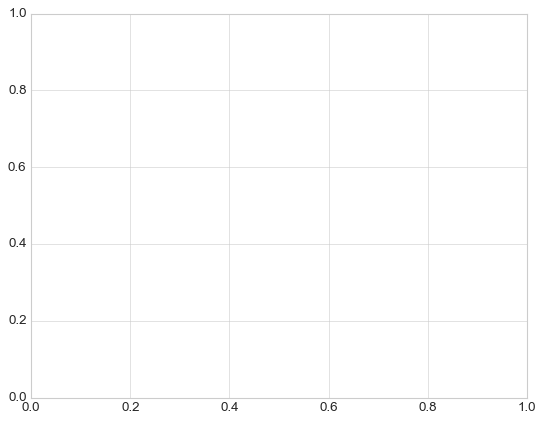

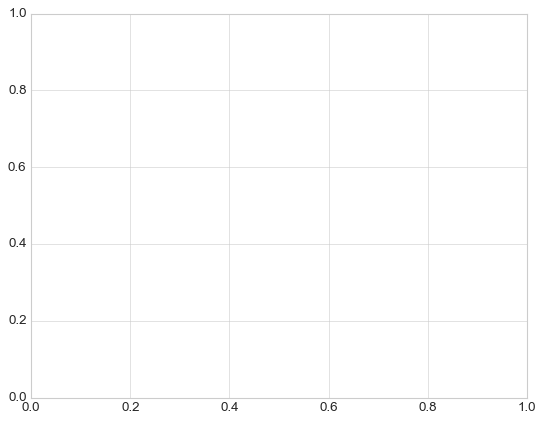

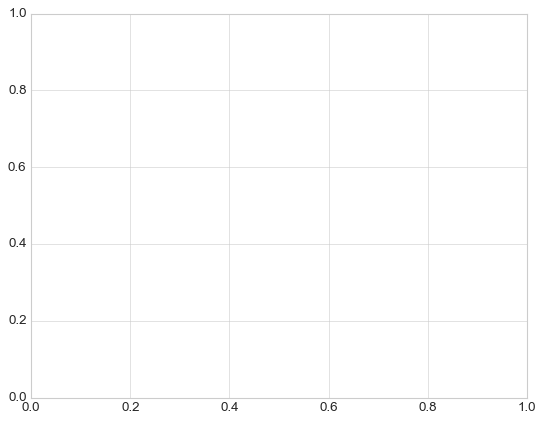

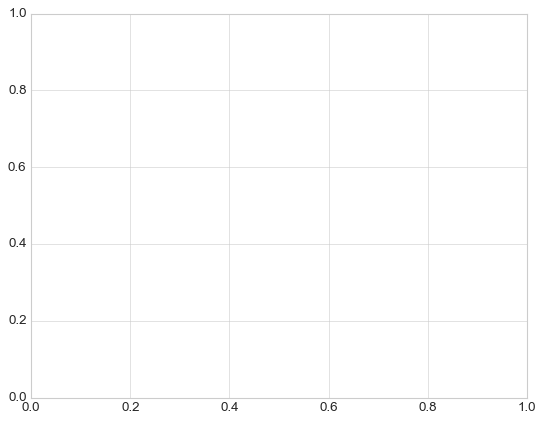

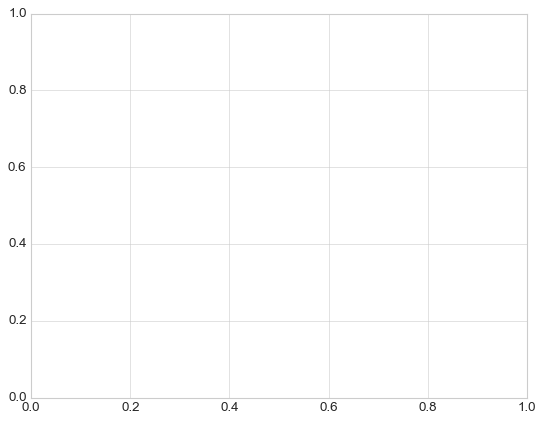

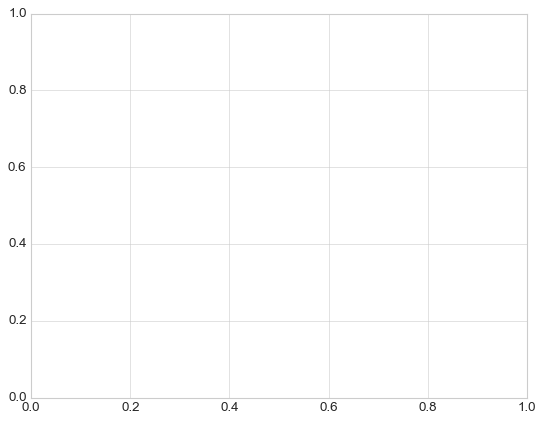

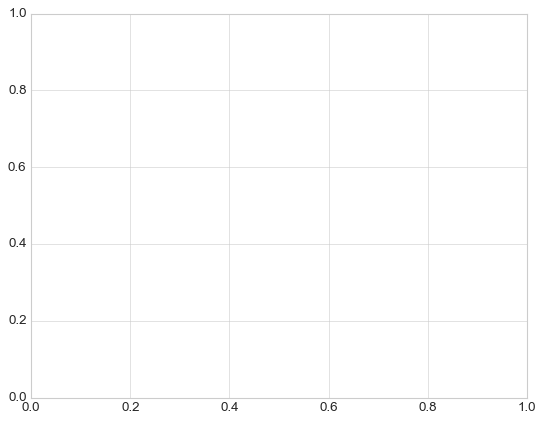

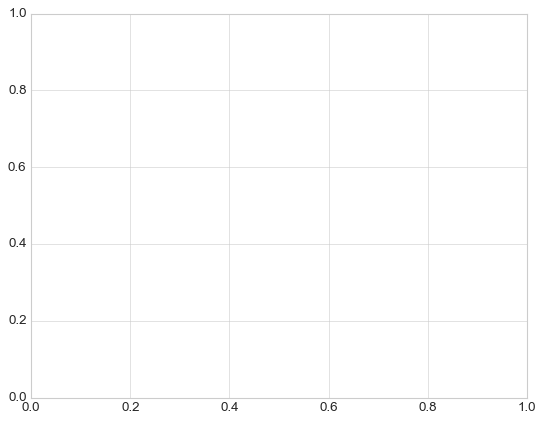

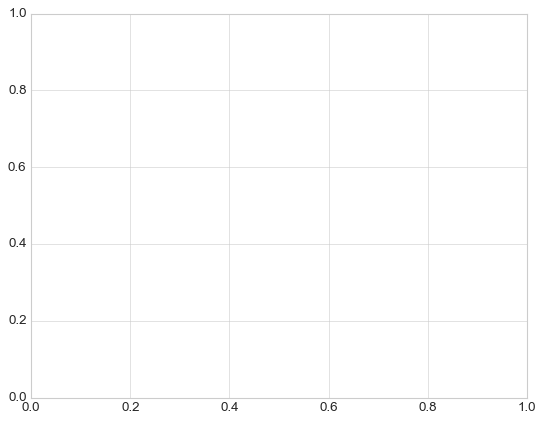

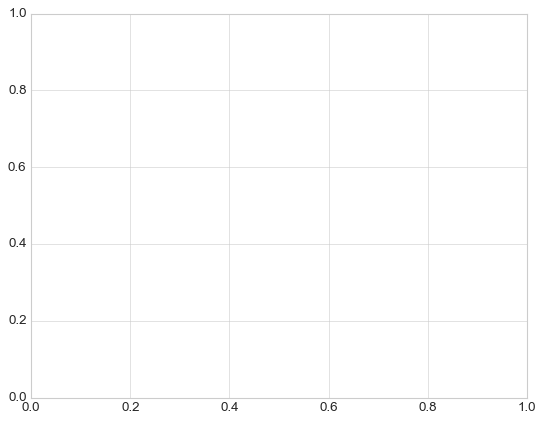

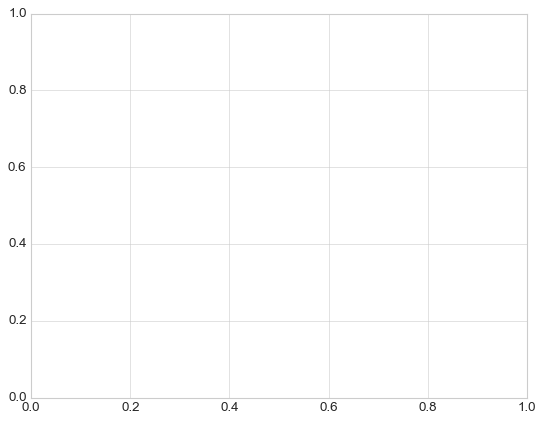

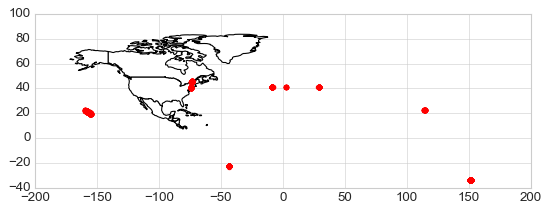

In [27]:
from bson.json_util import dumps

address = db.listingsAndReviews.find({'property_type' : 'House'}, {"address.location.coordinates" : 1})

#print(dumps(address))
listLoc = []

for data in address:
    d1 = data.get('address')
    location = d1.get('location')
    coordinates = location.get('coordinates')
    listLoc.append(coordinates)

df0facetLoc = pd.DataFrame(listLoc)
print(df0facetLoc.head())

# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))
df0facetLoc.rename(columns={'0': 'Longitude', '1': 'Latitude'}, inplace=True)
print(df0facetLoc.head())
longitude = df0facetLoc[0]
latitude = df0facetLoc[1]
# plot points
import plotly.express as px

#plt.scatter(x=df0facetLoc, y=df0facetLoc)
#plt.show()

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import contextily as ctx

geometry = [Point(xy) for xy in zip(longitude, latitude)]
#gdf = GeoDataFrame(df0facetLoc, geometry=geometry)   
gdf = gpd.GeoDataFrame(
    df0facetLoc, geometry=gpd.points_from_xy(longitude, latitude))
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax1 = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')
gdf.plot(ax=ax1, marker='o', color='red', markersize=15);
plt.show()


[5506   26   10    7    6]
['Real Bed' 'Pull-out Sofa' 'Futon' 'Couch' 'Airbed']


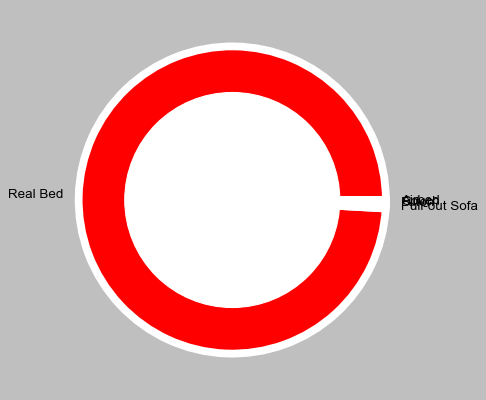

In [7]:
# create data
size = df0facetBedType['Number_Of_Bed'].to_numpy() 
print(size)
names = df0facetBedType['BedType'].to_numpy() 
print(names)
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['red','green','blue','skyblue'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.style.use('seaborn-whitegrid')
# Show the graph
plt.show()

          RoomType  Number_Of_room_type
0  Entire home/apt                 3489
1     Private room                 1983
2      Shared room                   83


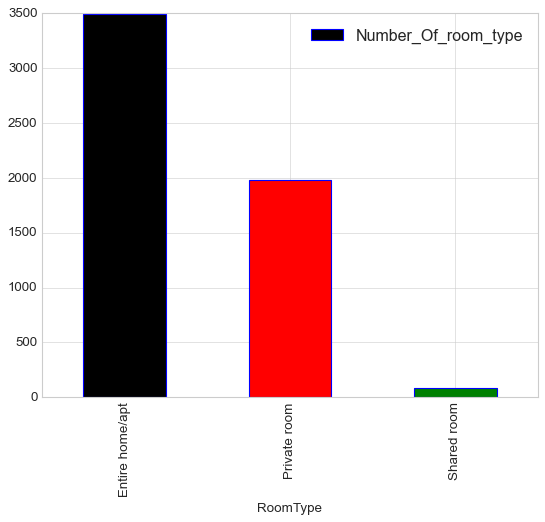

<Figure size 1600x800 with 0 Axes>

In [8]:

df0facetRoomType = pd.DataFrame(room_type)
df0facetRoomType.style.set_properties(**{'border': '1.3px solid green','color': 'red'})
#df0facetRoomType.style.set_na_rep("OutofScope").highlight_null(null_color="orange")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', 'red')]
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
df0facetRoomType.style.set_table_styles([cell_hover, index_names, headers])
df0facetRoomType.style.highlight_max()

df0facetRoomType.rename(columns={'_id': 'RoomType', 'count': 'Number_Of_room_type'}, inplace=True)
#df0facetRoomType.head()
df0facetRoomType.head(10).style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'green',                       
                                    'border-color': 'red'})
df0facetRoomType.style.set_properties({'background-color': 'black',                                                   
                                    'color': 'green',                       
                                    'border-color': 'red'})

print(df0facetRoomType.head())
df0facetRoomType.plot(kind="bar", x="RoomType", y="Number_Of_room_type",
                      color=['black', 'red', 'green', 'blue', 'cyan'] , edgecolor='blue')

plt.figure(figsize=(20,10))
plt.style.use('seaborn-whitegrid')
plt.show()


In [9]:
import numpy as np

# Add a bar in the polar coordinates
plt.subplot(111, polar=True);
plt.bar(x=0, height=10, width=np.pi/2, bottom=5);

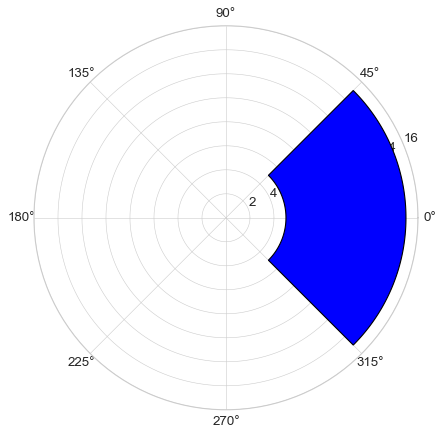

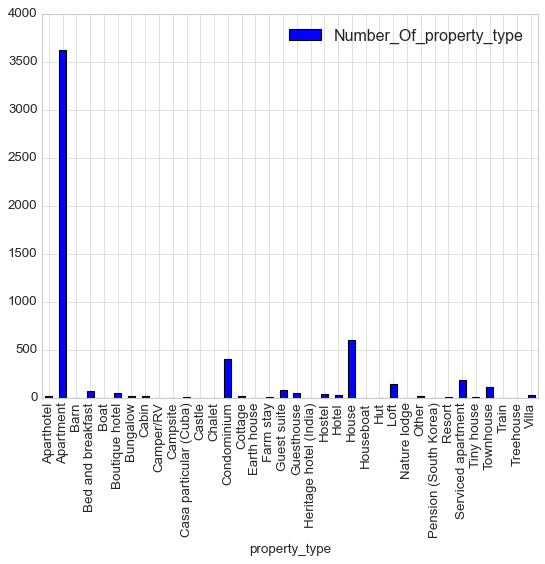

In [10]:

#print("stargroup1 :::",stargroup1)
list = []
for group in stargroup:
    list.append(group)
    #print(group)
#print(list)
df0 = pd.DataFrame(list)
df0.rename(columns={'_id': 'property_type', 'count': 'Number_Of_property_type'}, inplace=True)

df0.style.format({"property_type": '{:.1f}'})
df0.head()
#print("", df0)
#print("before ==", df0.dtypes)


df0.plot(kind="bar", x="property_type", y="Number_Of_property_type")
plt.show()

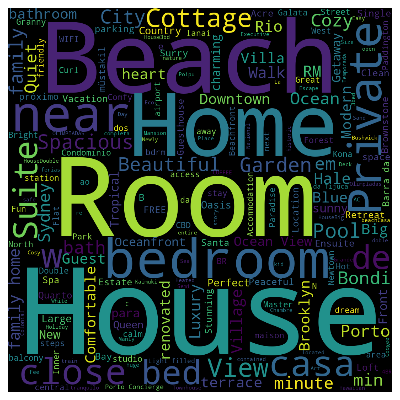

In [11]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
fivestarcount = db.listingsAndReviews.find({'property_type': 'House'})
listData = ''
for data in fivestarcount:
    listData += data.get('name')
    listData += ""
# Create the wordcloud object
wordcloud = WordCloud(width=1080, height=1080, margin=0).generate(listData)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [12]:
fivestar = db.listingsAndReviews.find_one({'property_type': 'House'})
#print(fivestar)

In [13]:
#https://www.tutorialspoint.com/mongoengine/mongoengine_connecting_to_mongodb_database.htm

connect(host="mongodb://localhost:27017/config")

#dbs=con.list_database_names()

#for db in dbs:
#    print (db)
    
#collections=con['local'].list_collection_names()
#print("collections[0] == ",hckdata.objects)

class hckdata(DynamicDocument):
    #name = StringField()
    #bedrooms = IntField()
    name = StringField(db_field="name")
    bedrooms = IntField(db_field="bedrooms")
    bedrooms = IntField(db_field="bedrooms")
    property_type = StringField(db_field="property_type")
    def _init__(self, name, bedrooms, property_type):
          self.name = name
          self.bedrooms = bedrooms
          self.property_type = property_type
        
    
data = []
print("len(hckdata.objects) ==",len(hckdata.objects))
#for product1 in hckdata.objects:
#    data.append(jsons.dump(product1))



pipeline = [
   {"$group": {"_id": "$property_type", "total": {"$sum": "$bedrooms"}}}
   ]

docs = hckdata.objects().aggregate(pipeline)
print("pipeline::docs ::", docs)
entries1 = list(docs)
print("pipeline::entries1 ::", entries1)
df1 = pd.DataFrame(entries1)
df1.head()
print(" ==", df1)
print("before ==", df1.dtypes)


df1.plot(kind="pie", x="_id", y="total")
plt.show()

dict_data = {"ids": ["123456", "7890"], "fields": ["hello", "goodbye"]}
df_dict = pd.DataFrame(dict_data)
print(" ==", df_dict)

print("before ==", df_dict.dtypes)
df_dict['ids']=df_dict['ids'].astype(int)
df_dict['fields']=df_dict['fields'].astype(str)
print("after ==", df_dict.dtypes)
df_dict.plot(kind="bar")
#df1.plot(kind="bar", x="name", y="bedrooms")
#df1.plot('name')
plt.show()
#df1.plot('name')
#df.plot(kind="bar", x="hostname", y="pid")
#df.plot('product.hostname')
#f = startup_log.objects.only('property_type')
#f1 = startup_log.objects.only('bedrooms')
#df = pandas.read_sql("SELECT borough, cuisine FROM restaurants WHERE Name = 'Morris Park Bake Shop'", con)

#df = pandas.read_sql("SELECT property_type, bedrooms FROM startup_log", con)

#df.plot(kind="bar", x="property_type", y="bedrooms")
#plt.show()
#data = pandas.DataFrame(list(startup_log.objects.find()))

len(hckdata.objects) == 0
pipeline::docs :: <pymongo.command_cursor.CommandCursor object at 0x7f95b99b0f10>


TypeError: 'list' object is not callable